# 5. 分类和标注词汇
1. 什么是词汇分类，在自然语言处理中它们是如何使用？
2. 一个好的存储词汇和它们的分类的Python 数据结构是什么？
3. 我们如何自动标注文本中词汇的词类？

## 5.1 使用词性标注器

In [3]:
import nltk
text = nltk.word_tokenize("And now for something completely different") # 先将文本进行分词
print(nltk.pos_tag(text)) # 返回('词', '词性')的二元组列表

[('And', 'CC'), ('now', 'RB'), ('for', 'IN'), ('something', 'NN'), ('completely', 'RB'), ('different', 'JJ')]


In [12]:
# 查看词性缩写的实际意义
print(nltk.help.upenn_tagset('RB'))
print()
print(nltk.help.upenn_tagset('NN.*'))

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
None

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensi

## 5.2 标注语料库

In [18]:
# 对于已标注的文本进行拆分
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
print([nltk.tag.str2tuple(t) for t in sent.split()])

[('The', 'AT'), ('grand', 'JJ'), ('jury', 'NN'), ('commented', 'VBD'), ('on', 'IN'), ('a', 'AT'), ('number', 'NN'), ('of', 'IN'), ('other', 'AP'), ('topics', 'NNS'), (',', ','), ('AMONG', 'IN'), ('them', 'PPO'), ('the', 'AT'), ('Atlanta', 'NP'), ('and', 'CC'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('purchasing', 'VBG'), ('departments', 'NNS'), ('which', 'WDT'), ('it', 'PPS'), ('said', 'VBD'), ('``', '``'), ('ARE', 'BER'), ('well', 'QL'), ('operated', 'VBN'), ('and', 'CC'), ('follow', 'VB'), ('generally', 'RB'), ('accepted', 'VBN'), ('practices', 'NNS'), ('which', 'WDT'), ('inure', 'VB'), ('to', 'IN'), ('the', 'AT'), ('best', 'JJT'), ('interest', 'NN'), ('of', 'IN'), ('both', 'ABX'), ('governments', 'NNS'), ("''", "''"), ('.', '.')]


In [22]:
# 读取已标注的语料库
print(nltk.corpus.brown.tagged_words()[:6]) # 详细版标注方法
print(nltk.corpus.brown.tagged_words(tagset='universal')[:6]) # 简化版标注方法

[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD')]
[('The', 'DET'), ('Fulton', 'NOUN'), ('County', 'NOUN'), ('Grand', 'ADJ'), ('Jury', 'NOUN'), ('said', 'VERB')]


[('NOUN', 30654), ('VERB', 14399), ('ADP', 12355), ('.', 11928), ('DET', 11389), ('ADJ', 6706), ('ADV', 3349), ('CONJ', 2717), ('PRON', 2535), ('PRT', 2264), ('NUM', 2166), ('X', 92)]


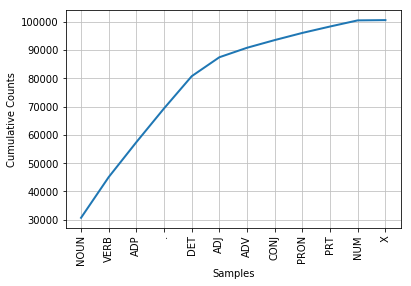

In [27]:
# 查看brown语料库中不同词性的出现频次
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
print(tag_fd.most_common())
tag_fd.plot(cumulative=True)

### 名词

In [45]:
# 名词前一个词的最常见词性
word_tag_pairs = nltk.bigrams(brown_news_tagged)
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN'] # 找到名词前一个词的词性
fdist = nltk.FreqDist(noun_preceders)
print([(tag, count) for (tag, count) in fdist.most_common()]) # 显示词频统计

[('NOUN', 7959), ('DET', 7373), ('ADJ', 4761), ('ADP', 3781), ('.', 2796), ('VERB', 1842), ('CONJ', 938), ('NUM', 894), ('ADV', 186), ('PRT', 94), ('PRON', 19), ('X', 11)]


### 动词

In [40]:
# 高频动词统计
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
print([wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB'][:10]) # 高频动词统计

['is', 'said', 'was', 'are', 'be', 'has', 'have', 'will', 'says', 'would']


In [53]:
# 查看某个词作为各词性出现的频次
cfd = nltk.ConditionalFreqDist(wsj)
print(cfd['yield'].most_common())

[('VB', 28), ('NN', 20)]


In [49]:
# 查看预料中某类动词的高频词
wsj = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
print(cfd2['VBN'].most_common()[:10])

[('been', 150), ('expected', 52), ('made', 33), ('compared', 32), ('based', 31), ('used', 26), ('priced', 26), ('sold', 25), ('named', 20), ('designed', 20)]


In [56]:
# 找到同时可以作为不同词性的词
print([w for w in cfd.conditions() if 'VBD' in cfd[w] and 'VBN' in cfd[w]][10:16])

['sold', 'worked', 'died', 'found', 'rejected', 'imposed']


### 复杂的标记形式

In [57]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news')) # 找到名词的复杂标记形式
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

### 探索已标注的语料库

In [58]:
# 找到often后紧接的常见词性
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


In [63]:
# 找到 v to v形式的trigram
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)

for tagged_sent in brown.tagged_sents()[:100]:
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see


In [65]:
# 找到有三种以上词性的词
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                 for (word, tag) in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


## 5.3 使用 Python 字典映射词及其属性

### nltk的默认字典

In [79]:
# 对于int，如果key不存在，不会报错而是返回0
frequency = nltk.defaultdict(int)
frequency['colorless'] = 4
print(frequency['ideas'])

0
defaultdict(<class 'int'>, {'colorless': 4, 'ideas': 0})


In [74]:
# 对于list，如果key不存在，不会报错而是返回[]
pos = nltk.defaultdict(list)
pos['sleep'] = ['N', 'V']
print(pos['ideas'])

[]


In [82]:
# 可以设置默认值，如果key不存在，返回该值
pos = nltk.defaultdict(lambda: 'N')
pos['colorless'] = 'ADJ'
print(pos['blog'])
print(dict(pos)) # 要求输出的值也会自动添加到字典中

N
{'colorless': 'ADJ', 'blog': 'N'}


In [85]:
# 实际应用：使用UNK代替低频词词
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')
vocab = nltk.FreqDist(alice)
v1000 = [word for (word, _) in vocab.most_common(1000)]
mapping = nltk.defaultdict(lambda: 'UNK')
for v in v1000:
    mapping[v] = v
alice2 = [mapping[v] for v in alice]
print(alice2[:10])

['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'UNK', 'UNK']


### 复杂的键和值

In [90]:
# 已知前次词性和当前词时，当前词义的分布
pos = defaultdict(lambda: defaultdict(int))
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged):
    pos[(t1, w2)][t2] += 1
pos[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

## 5.4 自动标注

In [94]:
# benchmark
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

### 默认标注器

In [109]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
print(default_tagger.tag(tokens))
print()
print('POS tagging accuracy: {}'.format(default_tagger.evaluate(brown_tagged_sents)))

[('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('green', 'NN'), ('eggs', 'NN'), ('and', 'NN'), ('ham', 'NN'), (',', 'NN'), ('I', 'NN'), ('do', 'NN'), ('not', 'NN'), ('like', 'NN'), ('them', 'NN'), ('Sam', 'NN'), ('I', 'NN'), ('am', 'NN'), ('!', 'NN')]

POS tagging accuracy: 0.13089484257215028


### 正则表达式标注器

In [110]:
patterns = [
     (r'.*ing$', 'VBG'),               # gerunds
     (r'.*ed$', 'VBD'),                # simple past
     (r'.*es$', 'VBZ'),                # 3rd singular present
     (r'.*ould$', 'MD'),               # modals
     (r'.*\'s$', 'NN$'),               # possessive nouns
     (r'.*s$', 'NNS'),                 # plural nouns
     (r'^-?[0-9]+(.[0-9]+)?$', 'CD'),  # cardinal numbers
     (r'.*', 'NN')                     # nouns (default)
 ]
regexp_tagger = nltk.RegexpTagger(patterns)
print(regexp_tagger.tag(brown_sents[3]))
print()
print('POS tagging accuracy: {}'.format(regexp_tagger.evaluate(brown_tagged_sents)))

[('``', 'NN'), ('Only', 'NN'), ('a', 'NN'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'NN'), ('such', 'NN'), ('reports', 'NNS'), ('was', 'NNS'), ('received', 'VBD'), ("''", 'NN'), (',', 'NN'), ('the', 'NN'), ('jury', 'NN'), ('said', 'NN'), (',', 'NN'), ('``', 'NN'), ('considering', 'VBG'), ('the', 'NN'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'NN'), ('the', 'NN'), ('election', 'NN'), (',', 'NN'), ('the', 'NN'), ('number', 'NN'), ('of', 'NN'), ('voters', 'NNS'), ('and', 'NN'), ('the', 'NN'), ('size', 'NN'), ('of', 'NN'), ('this', 'NNS'), ('city', 'NN'), ("''", 'NN'), ('.', 'NN')]

POS tagging accuracy: 0.20326391789486245


### 查询标注器

In [112]:
# unigram方法
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100) # 可以选择模型包含词的个数，词数越高，准确性就会越高，但也越耗时
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words) # 按出现频率最高的词型来标准
baseline_tagger = nltk.UnigramTagger(model=likely_tags) # 当选择的词过少时，实际上很多词都没有被标注
print(baseline_tagger.tag(brown_sents[3]))
print()
print('POS tagging accuracy: {}'.format(baseline_tagger.evaluate(brown_tagged_sents)))

[('``', '``'), ('Only', None), ('a', 'AT'), ('relative', None), ('handful', None), ('of', 'IN'), ('such', None), ('reports', None), ('was', 'BEDZ'), ('received', None), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', None), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', None), ('the', 'AT'), ('widespread', None), ('interest', None), ('in', 'IN'), ('the', 'AT'), ('election', None), (',', ','), ('the', 'AT'), ('number', None), ('of', 'IN'), ('voters', None), ('and', 'CC'), ('the', 'AT'), ('size', None), ('of', 'IN'), ('this', 'DT'), ('city', None), ("''", "''"), ('.', '.')]

POS tagging accuracy: 0.45578495136941344


In [114]:
# 对于未知词，用NN来标注
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))
print(baseline_tagger.tag(brown_sents[3]))
print()
print('POS tagging accuracy: {}'.format(baseline_tagger.evaluate(brown_tagged_sents)))

[('``', '``'), ('Only', 'NN'), ('a', 'AT'), ('relative', 'NN'), ('handful', 'NN'), ('of', 'IN'), ('such', 'NN'), ('reports', 'NN'), ('was', 'BEDZ'), ('received', 'NN'), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', 'NN'), ('the', 'AT'), ('widespread', 'NN'), ('interest', 'NN'), ('in', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('the', 'AT'), ('number', 'NN'), ('of', 'IN'), ('voters', 'NN'), ('and', 'CC'), ('the', 'AT'), ('size', 'NN'), ('of', 'IN'), ('this', 'DT'), ('city', 'NN'), ("''", "''"), ('.', '.')]

POS tagging accuracy: 0.5817769556656125


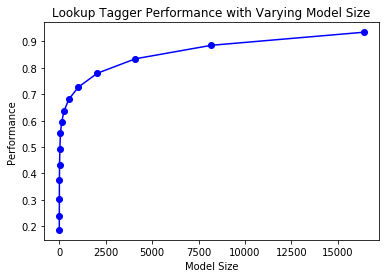

In [116]:
# 模型包含词数越多，准确率也就越高
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN')) # 建立模型
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news')) # 返回评估

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common() # 包含所有词
    words_by_freq = [w for (w, _) in word_freqs] # 单词列表(已按顺序排行)
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news')) # 条件分布
    sizes = 2 ** pylab.arange(15) # 词个数列表
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes] # 计算模型包含每个词个数的时候的表现
    pylab.plot(sizes, perfs, '-bo') # 绘图
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
display() 

## 5.5 N-gram 标注

### 一元标注（Unigram Tagging）

In [118]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common() 
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
print(baseline_tagger.tag(brown_sents[3]))
print()
print('POS tagging accuracy: {}'.format(baseline_tagger.evaluate(brown_tagged_sents)))

[('``', '``'), ('Only', 'RB'), ('a', 'AT'), ('relative', 'JJ'), ('handful', 'NN'), ('of', 'IN'), ('such', 'JJ'), ('reports', 'NNS'), ('was', 'BEDZ'), ('received', 'VBD'), ("''", "''"), (',', ','), ('the', 'AT'), ('jury', 'NN'), ('said', 'VBD'), (',', ','), ('``', '``'), ('considering', 'IN'), ('the', 'AT'), ('widespread', 'JJ'), ('interest', 'NN'), ('in', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('the', 'AT'), ('number', 'NN'), ('of', 'IN'), ('voters', 'NNS'), ('and', 'CC'), ('the', 'AT'), ('size', 'NN'), ('of', 'IN'), ('this', 'DT'), ('city', 'NN'), ("''", "''"), ('.', '.')]

POS tagging accuracy: 0.9349006503968017


### 分离训练和测试数据

In [124]:
size = int(len(brown_tagged_sents) * 0.9)
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
print('the size of all: {}; the size of train: {}; the size of test: {}'
      .format(len(brown_tagged_sents), len(train_sents), len(test_sents)))
unigram_tagger = nltk.UnigramTagger(train_sents)
print()
print('POS tagging accuracy for train set: {}'.format(baseline_tagger.evaluate(train_sents)))
print('POS tagging accuracy for test set: {}'.format(baseline_tagger.evaluate(test_sents)))

the size of all: 4623; the size of train: 4160; the size of test: 463

POS tagging accuracy for train set: 0.9350647915953204
POS tagging accuracy for test set: 0.9334197149406958


### 一般的 N-gram的标注

In [129]:
# 二元标注器
bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]))
print()
print('POS tagging accuracy for train set: {}'.format(bigram_tagger.evaluate(train_sents)))
print('POS tagging accuracy for test set: {}'.format(bigram_tagger.evaluate(test_sents)))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]

POS tagging accuracy for train set: 0.9535577379834513
POS tagging accuracy for test set: 0.7199242499750822


### 组合标注器

In [130]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0) # Unigram标注器无法标注的词用默认标注器来标注
t2 = nltk.BigramTagger(train_sents, backoff=t1)  # Bigram模型无法标注的词用Unigram标注器来标注
t2.evaluate(test_sents)
print(t2.tag(brown_sents[2007]))
print()
print('POS tagging accuracy for train set: {}'.format(t2.evaluate(train_sents)))
print('POS tagging accuracy for test set: {}'.format(t2.evaluate(test_sents)))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]

POS tagging accuracy for train set: 0.9736193811380784
POS tagging accuracy for test set: 0.8452108043456593


In [140]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.NgramTagger(3, train_sents, backoff=t2) # 添加trigram模型
t2.evaluate(test_sents)
print(t2.tag(brown_sents[2007]))
print()
print('POS tagging accuracy for train set: {}'.format(t3.evaluate(train_sents)))
print('POS tagging accuracy for test set: {}'.format(t3.evaluate(test_sents)))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]

POS tagging accuracy for train set: 0.9829321372941086
POS tagging accuracy for test set: 0.843317053722715


### 标注生词

In [187]:
vocab = nltk.FreqDist([k for train_sent in train_sents for (k, _) in train_sent])
v1000 = [word for (word, _) in vocab.most_common(12000)]
mapping = nltk.defaultdict(lambda: 'UNK') # 将低频词标记为UNK
for v in v1000:
    mapping[v] = v
train_sents2 = [[(mapping[k], p) for (k, p) in train_sent] for train_sent in train_sents]
test_sents2 = [[(mapping[k], p) for (k, p) in test_sent] for test_sent in test_sents]

In [189]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents2, backoff=t0)
t2 = nltk.BigramTagger(train_sents2, backoff=t1)
print(t2.tag(brown_sents[2007]))
print()
print('POS tagging accuracy for train set: {}'.format(t2.evaluate(train_sents2)))
print('POS tagging accuracy for test set: {}'.format(t2.evaluate(test_sents2)))

[('Various', 'JJ'), ('of', 'IN'), ('the', 'AT'), ('apartments', 'NNS'), ('are', 'BER'), ('of', 'IN'), ('the', 'AT'), ('terrace', 'NN'), ('type', 'NN'), (',', ','), ('being', 'BEG'), ('on', 'IN'), ('the', 'AT'), ('ground', 'NN'), ('floor', 'NN'), ('so', 'CS'), ('that', 'CS'), ('entrance', 'NN'), ('is', 'BEZ'), ('direct', 'JJ'), ('.', '.')]

POS tagging accuracy for train set: 0.9617436837860828
POS tagging accuracy for test set: 0.8385328416226453


### 性能限制

In [199]:
# 找到含有歧义的比例
cfd = nltk.ConditionalFreqDist(
            ((x[1], y[1], z[0]), z[1])
            for sent in brown_tagged_sents
            for x, y, z in nltk.trigrams(sent))
ambiguous_contexts = [c for c in cfd.conditions() if len(cfd[c]) > 1] # 三元组存在多个词性可能
print(sum(cfd[c].N() for c in ambiguous_contexts) / cfd.N())

0.049297702068029296


In [200]:
test_tags = [tag for sent in brown.sents(categories='editorial')
                  for (word, tag) in t2.tag(sent)]
gold_tags = [tag for (word, tag) in brown.tagged_words(categories='editorial')]
print(nltk.ConfusionMatrix(gold_tags, test_tags))  # 混淆矩阵

## 5.6 基于转换的标注
在原来模型的基础上添加规则，如：当前面的词是TO时，替换NN为VB；当后面的词是VB时，替换TO为IN等。

## 5.7 如何确定一个词的分类
- 形态线索：-ness/-ment等后缀经常代表名词、ing代表现在分词和动名词
- 句法线索：形容词容易出现在名词前、系动词后等
- 语义线索：如果一个词表示某个地方，那么它就应该是名词